# **Tarea 4**

Progama para Ciencia de los Datos

Módulo Aprendizaje Automático

FUNDATEC, TEC


Estudiantes: Edwin Mejía y Jorge Bulgarelli.

## **Instrucciones**

1. Aplicar modelo de Red Neural Profunda (ANN) al set de datos, optimizar hiperparámetros y evaluar resultados

**Fuente de datos**


Este dataset fue creado por Angeliki Xifara Ingeniera Civil y Estructural y fue procesado por Athanasios Tsanas de University of Oxford, UK.

Datos tomados de: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

<img src='https://github.com/feanor294/images/blob/main/Generalidades%20del%20Dataset.png?raw=true' width=500px>

Tiene 8 atributos (de X1 a X8) y 2 objetivos (y1 y y2)
Los nombres de las columnas son:
X1 = Relative Compactness, X2 = Surface Area, X3 = Wall Area, X4 = Roof Area, X5 = Overall Height, X6 =Orientation, X7 = Glazing Area, X8 = Glazing Area Distribution, y1 = Heating Load, y2 = Cooling Load


**Importar Librerías**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor

# La siguiente línea de código se utiliza para ignorar ciertas advertencias 
import warnings
warnings.filterwarnings('ignore')

import time
# La siguiente línea de código facilita la lectura de los datos,
# mostrando solamente 2 decimales de cada número pero sin realizar ningún cálculo.

pd.set_option('display.float_format','{:,.4f}'.format) 

Numpy es una librería que permite manipulación de estructuras de datos.

Pandas es una librería que permite multiples manipulaciones de datos.

Seaborn es una librería especializada en gráficos estadísticos.

Matplotlib es una librería de visualización.

Scipy es una librería que contiene pruebas estadísticas.

Sklearn.preprocessing y Sklearn.model_selection son unas librerías de pre-procesado de datos.

Sklearn es una librería de algoritmos de aprendizaje automático.

Sklearn.metrics es una librería de métricas de evaluación de modelos.

# **1. Función de evaluación de modelos**
Esta función permite evaluar modelos de regresión con base en las métricas MSE (Mean Squared Error), MAE (Mean Absolute Error) y R2 (Coeficiente de Correlación)

Parámetros de entrada:

modelo = Algoritmo de Regresión

X_entrenamiento = Subconjunto de Atributos de Entrenamiento

Y_entrenamiento = Subconjunto de Objetivos de Entrenamiento

X_entrenamiento = Subconjunto de Atributos de Prueba

Y_entrenamiento = Subconjunto de Objetivos de Prueba

MSE_E = Mean Squared Error Entrenamiento

MAE_E = Mean Absolute Error Entrenamiento

R2_E = Coeficiente de Correlación Entrenamiento

MSE_P = Mean Squared Error Prueba

MAE_P = Mean Absolute Error Prueba

R2_P = Coeficiente de Correlación Prueba

In [2]:
def evaluador(modelo, X_entrenamiento, Y_entrenamiento, X_prueba, Y_prueba):
  
  # Realizar predicciones del modelo
  predicciones_entrenamiento = modelo.predict(X_entrenamiento)
  predicciones_prueba = modelo.predict(X_prueba)

  # Métricas de evaluación: entrenamiento
  MSE_E = mean_squared_error(Y_entrenamiento, predicciones_entrenamiento)
  MAE_E = mean_absolute_error(Y_entrenamiento, predicciones_entrenamiento)
  R2_E = r2_score(Y_entrenamiento, predicciones_entrenamiento)
  
  # Métricas de evaluación: prueba
  MSE_P = mean_squared_error(Y_prueba, predicciones_prueba)
  MAE_P = mean_absolute_error(Y_prueba, predicciones_prueba)
  R2_P = r2_score(Y_prueba, predicciones_prueba)
  
  return MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba

## 1.1 Métricas de Evaluación

Error absoluto medio, MAE: 

Es una medida de la diferencia entre dos variables continuas.

Error cuadrático medio, MSE:

El error cuadrático medio mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.

Coeficiente de Correlación/Determinación, R²:

Es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis.

Evaluador Lineal:

También es posible utilizar una Regresión Lineal para estimar el error. Dado que Y_predicho debería ser lo más parecido a Y_real, al graficar una en función de la otra, se debería obtner una línea recta de la forma Y = X, donde el intercepto es un indicador de errores constantes (sesgo en el modelo) y la pendiente corresponde a errores que varían en función del ajuste del modelo.
<br>
Si $b > 0$, el modelo tiene un sesgo positivo (tiende a estimar valores mayores al real); si $b < 0$, el modelo tiene un sesgo negativo (tiende a estimar valores menores al real).
<br>
Si $m > 0$, el modelo tiene un sobreajuste (tiende a estimar mejor resultados con el conjunto de entrenamiento que con el conjunto de prueba); si $m < 0$, el modelo tiene un subajuste (tiende a estimar relativamente malos resultados con el conjunto de entrenamiento y con el conjunto de prueba).

# **2. Pre-Procesado Datos**

In [3]:
url = 'https://raw.githubusercontent.com/feanor294/datasets/main/ENB2012_data.csv'
df = pd.read_csv(url)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.9800,514.5000,294.0000,110.2500,7.0000,2,0.0000,0,15.5500,21.3300
1,0.9800,514.5000,294.0000,110.2500,7.0000,3,0.0000,0,15.5500,21.3300
2,0.9800,514.5000,294.0000,110.2500,7.0000,4,0.0000,0,15.5500,21.3300
3,0.9800,514.5000,294.0000,110.2500,7.0000,5,0.0000,0,15.5500,21.3300
4,0.9000,563.5000,318.5000,122.5000,7.0000,2,0.0000,0,20.8400,28.2800


Cambiar nombres de columnas usando el método rename columns de librería Pandas

In [4]:
df.rename(columns = {   'X1' : 'Relative_Compactness', 'X2' :'Surface_Area' , 'X3' : 'Wall_Area', 'X4' : 'Roof_Area', \
                        'X5' : 'Overall_Height' , 'X6' : 'Orientation' , 'X7' :'Glazing_Area', \
                        'X8' : 'Glazing_Area_Distribution', 'Y1' : 'Heating_Load', 'Y2' : 'Cooling_Load'}, inplace = True)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.9800,514.5000,294.0000,110.2500,7.0000,2,0.0000,0,15.5500,21.3300
1,0.9800,514.5000,294.0000,110.2500,7.0000,3,0.0000,0,15.5500,21.3300
2,0.9800,514.5000,294.0000,110.2500,7.0000,4,0.0000,0,15.5500,21.3300
3,0.9800,514.5000,294.0000,110.2500,7.0000,5,0.0000,0,15.5500,21.3300
4,0.9000,563.5000,318.5000,122.5000,7.0000,2,0.0000,0,20.8400,28.2800


**Análisis Exploratorio de Datos (EDA)**

Confirmar si hay valores nulos y formatos de las columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Con la función de librería Describe podremos observar como se compartan los datos del set datos por columna.

In [6]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,0.7642,671.7083,318.5000,176.6042,5.2500,3.5000,0.2344,2.8125,22.3072,24.5878
std,0.1058,88.0861,43.6265,45.1660,1.7511,1.1188,0.1332,1.5510,10.0902,9.5133
min,0.6200,514.5000,245.0000,110.2500,3.5000,2.0000,0.0000,0.0000,6.0100,10.9000
25%,0.6825,606.3750,294.0000,140.8750,3.5000,2.7500,0.1000,1.7500,12.9925,15.6200
50%,0.7500,673.7500,318.5000,183.7500,5.2500,3.5000,0.2500,3.0000,18.9500,22.0800
75%,0.8300,741.1250,343.0000,220.5000,7.0000,4.2500,0.4000,4.0000,31.6675,33.1325
max,0.9800,808.5000,416.5000,220.5000,7.0000,5.0000,0.4000,5.0000,43.1000,48.0300


Utilizando la función Pairplot de Seaborn visualizaremos gráficos por pares de datos.

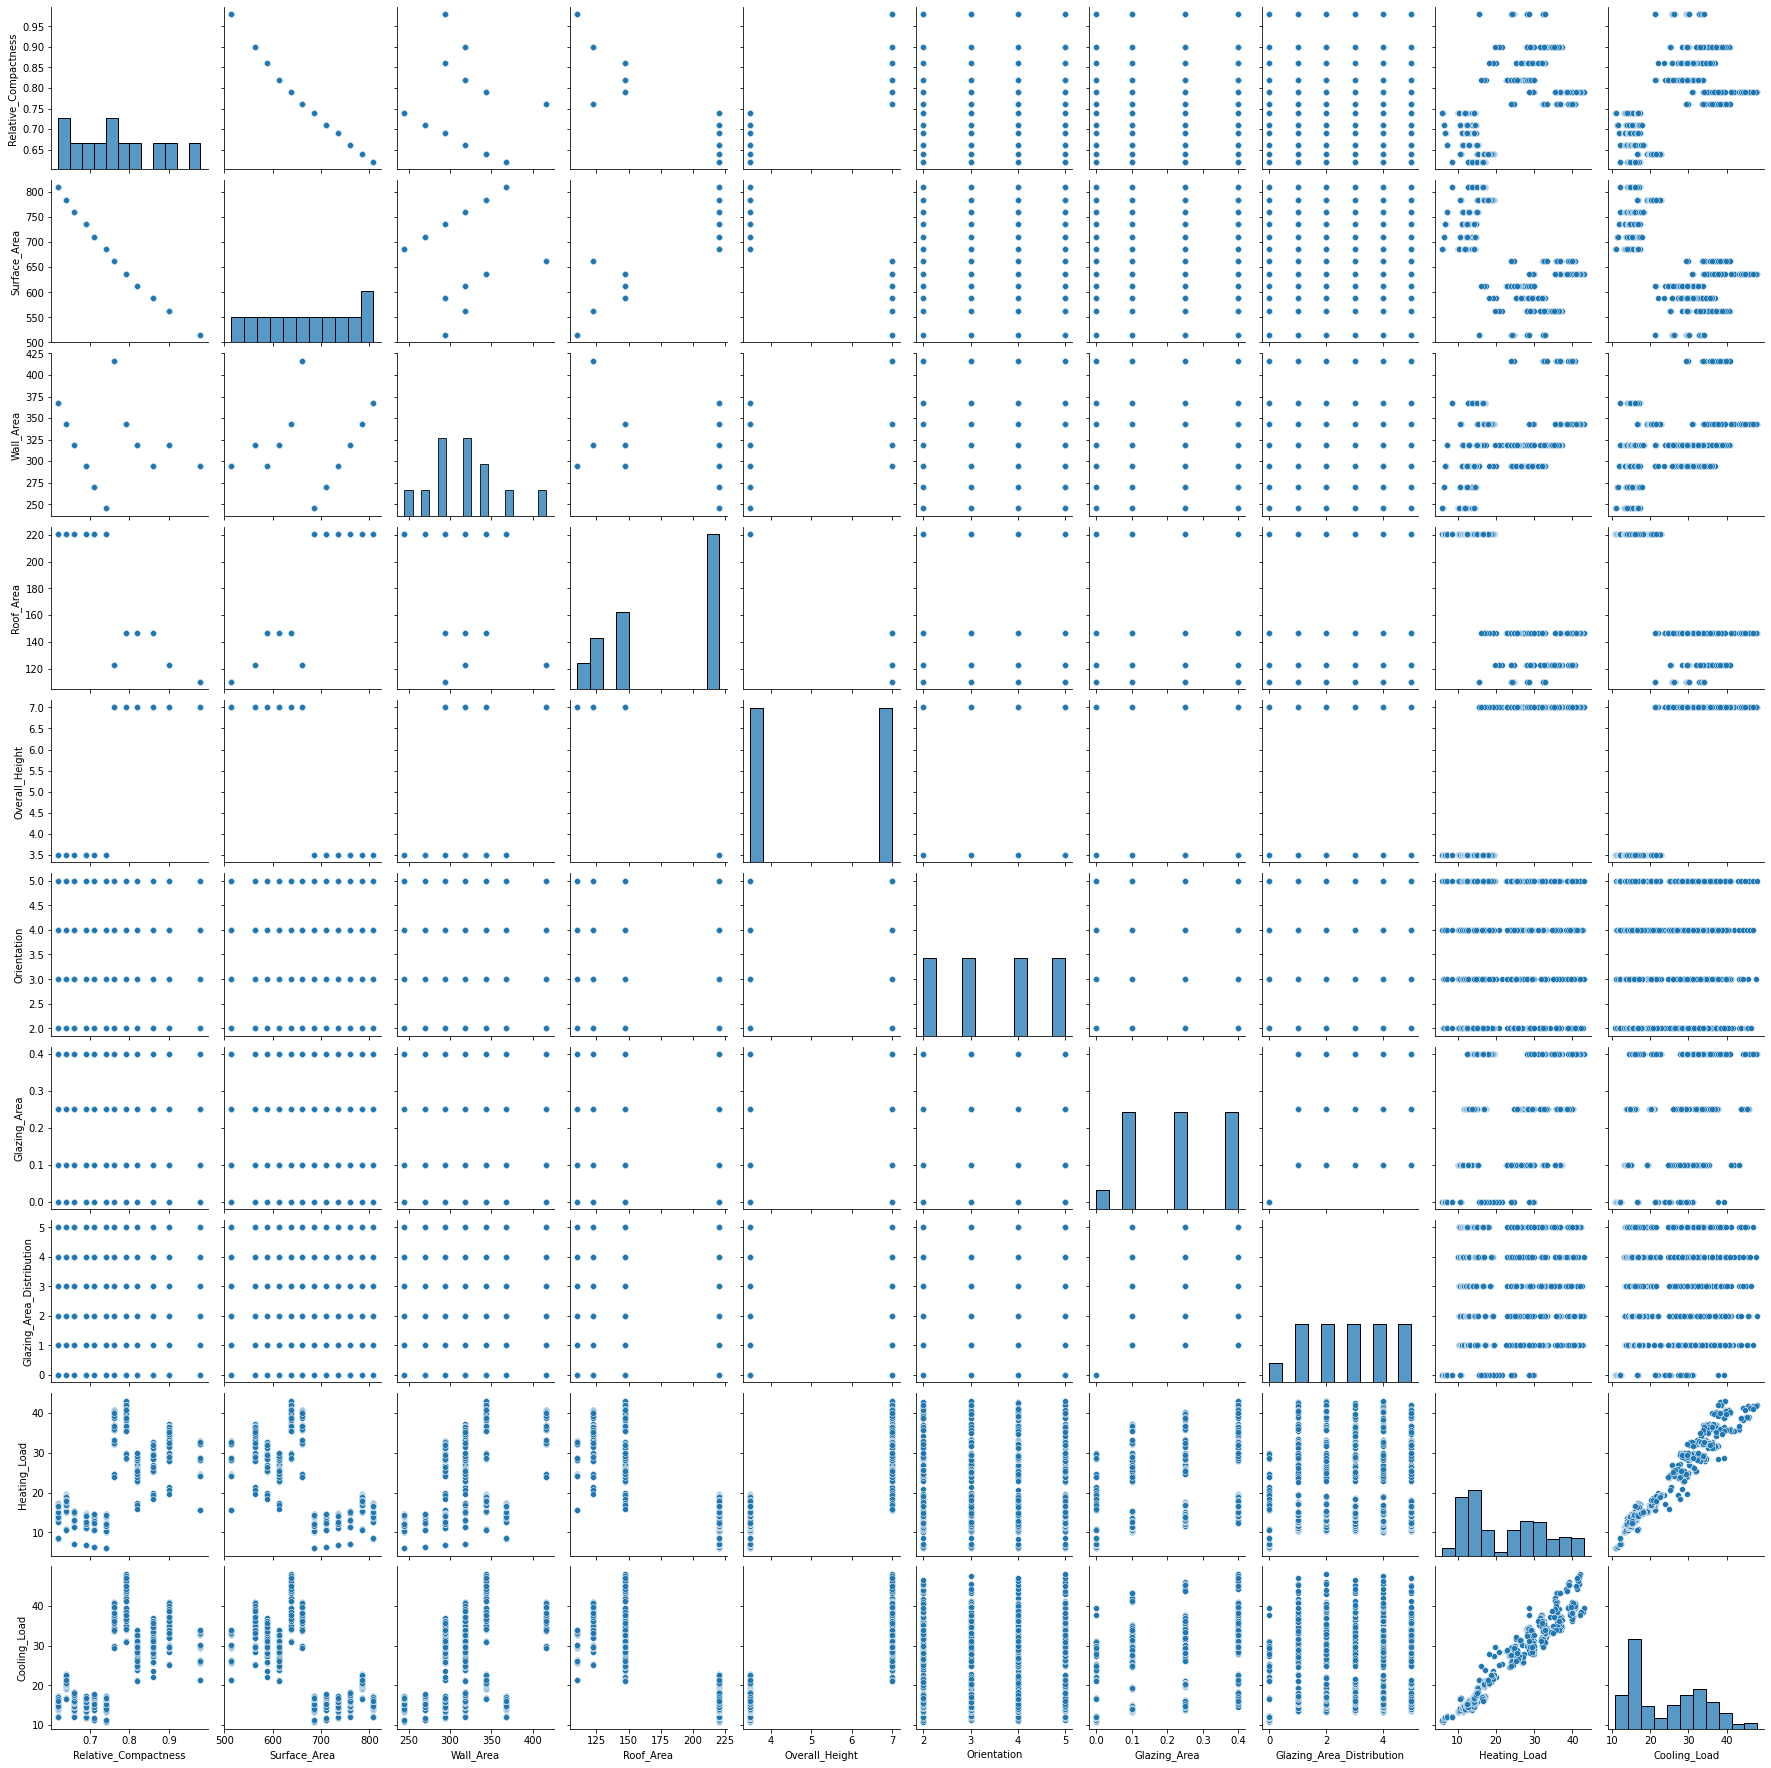

In [7]:
sns.pairplot(df)

La siguiente función de librería crea un mapa de calor utilizando Seaborn. Con esta función es posible identificar correlaciones entre los atributos del set de datos.

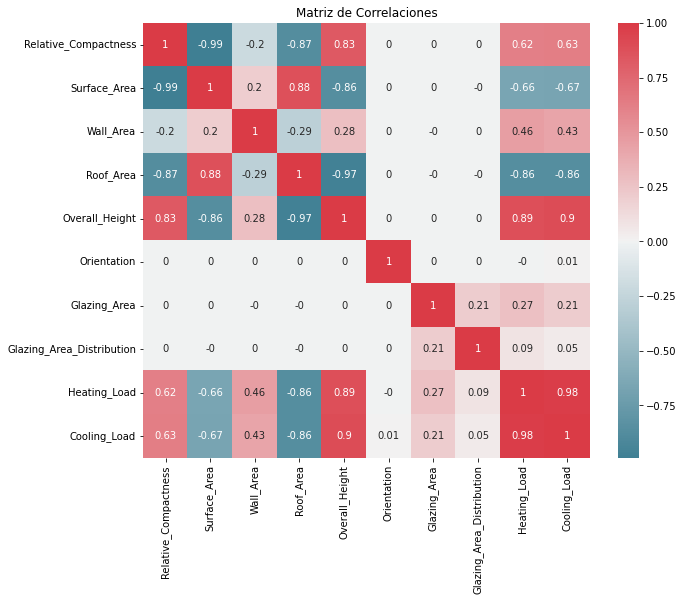

In [8]:
plt.figure(figsize=(10, 8))
plt.title('Matriz de Correlaciones')
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(round(df.corr(), 2), annot=True, cmap=colormap)

En nuestra área de aplicación la medida de correlación sirve para inferir una posible relación lineal entre 2 atributos ya sea que las 2 variables aumenten (correlación positiva) o que una aumente y la otra disminuya (correlación negativa).

Los atributos con una **correlación positiva** mas fuerte son: 

a) Heating_Load con Cooling_Load

b) Overall_Height con Cooling_Load

c) Surface_Area con Roof_Area

<br>

Mientras que se visualiza una fuerte **correlación negativa** en:

d) Surface_Area con Relative_Compactness

e) Roof_Area con Relative_Compactness

f) Roof_Area con Overall_Height


 **Visualización Usando Matplotlib**

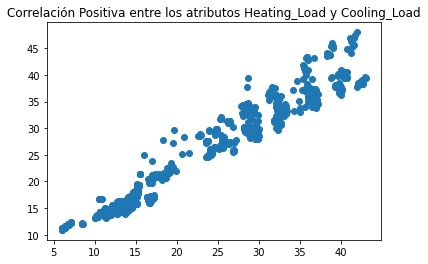

In [9]:
plt.scatter(x = df['Heating_Load'], y = df['Cooling_Load'] )
plt.title('Correlación Positiva entre los atributos Heating_Load y Cooling_Load')
plt.show()

La carga de calentamiento (Heating_Load) corresponde a la cantidad de calor necesaria añadir para que el edificio mantenga una temperatura constante cuando el entorno está a muy baja temperatura con respecto al interior. La carga de enfriamiento (Coling_Load) es la cantidad de calor necesario a extraer cuando  el entorno está a muy alta temperatura con respecto al interior. Dado que la misma barrera (concreto, paredes, cielos rasos, etc) actua en ambos casos tiene sentido que la correlación entre ambos atributos sea positiva.


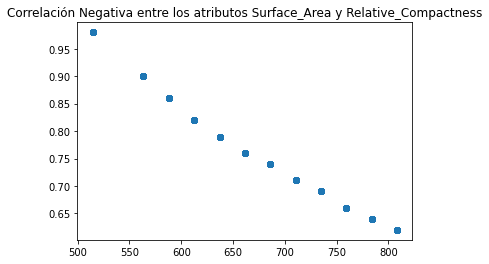

In [10]:
plt.scatter(x = df['Surface_Area'], y = df['Relative_Compactness'] )
plt.title('Correlación Negativa entre los atributos Surface_Area y Relative_Compactness')
plt.show()

El Relative_Compactness es una medida que determina que tanta área esta expuesta con respecto al volumen que encierra el edificio (en términos de contrucción y eficiencia energética es un factor clave). El área superficial (Surface_Area) corresponde al área expuesta. A mayor área hay menor compactación relativa porque es necesaria un área muy grande para cubrir un volumen relativamente pequeño. Otra forma de verlo es que al aumentar el volumen en una unidad el área superficial va a aumentar en más de una unidad y eso va a ocasionar que la compactación relativa disminuya dado que la compactación relativa es una función inversa del área superficial.

 **Definir si Estandarizar o Normalizar**

**Normalizar** consiste en reescalar los datos entre un rango de 0 y 1. Fórmula para normalización dada por:

$\displaystyle x \ normalizado = \frac{x \ - \ min(x)}{max(x)\ - \ min (x) }$

La normalización es una buena técnica para usar cuando no conoce la distribución de sus datos o cuando sabe que la distribución no es gaussiana (una curva de campana).

**Estandarizar** consiste en reescalar para obtener una media de 0 y una desviación estandar de 1. Fórmula para estandarización dada por:

$\displaystyle x \ estandarizado = \frac{x \ - \mu}{\sigma }$

Donde $\mu$ corrresponde a la media de los datos y  $\sigma$ a la desviación estándar de los datos. La estandarización asume que sus datos tienen una distribución gaussiana (curva de campana).


Para decidir cual transfomación aplicar es necesario probar la normalidad o no de la distribución de los datos. Hay formas de realizar estas pruebas para este caso usaremos 2 pruebas una visual y otra estadistica. 

**Prueba visual de distribución normal con librería Seaborn**

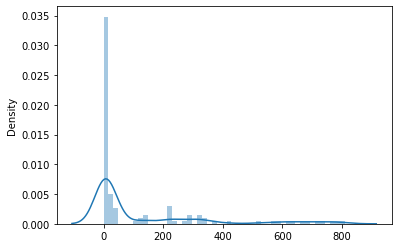

In [11]:
sns.distplot(df)

**Prueba estadística de distribución normal con librería Shapiro**

In [12]:
stat, p = shapiro(df)

print('stat=%.3f, p=%.3f\n' % (stat, p) )

if p > 0.05:
    print('Probabilidad Gausiana')
else:
    print('Probabilidad No Gausiana')

stat=0.635, p=0.000

Probabilidad No Gausiana


Ambas pruebas demuestran que el set de datos no presenta un distribución normal. Por lo que estaremos procediendo a Normalizar estos datos.

**Normalizar**

Conversión de dataframe a matriz mxn (arreglo de datos de Numpy) para utilización de la funcion de normalización de la librería Scikit Learn.

In [13]:
datos_para_normalizacion = np.array(df)

**Aplicar la funcion de normalización de la librería Scikit Learn**

In [14]:
scaler = MinMaxScaler()
scaler.fit(datos_para_normalizacion)
datos_normalizados = scaler.transform(datos_para_normalizacion)

**Convertir arreglo de datos de Numpy a Dataframe**

In [15]:
df_normalizado = pd.DataFrame(datos_normalizados)

# Reemplazar nombres de columnas para separación de subconjuntos de entrenamiento y prueba. 
df_normalizado.rename(columns = {0 : 'X1', 
                                 1: 'X2', 
                                 2 : 'X3', 
                                 3: 'X4' , 
                                 4 : 'X5', 
                                 5: 'X6', 
                                 6: 'X7', 
                                 7: 'X8',  
                                 8: 'y1', 
                                 9: 'y2'}, inplace = True)

df_normalizado.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,y1,y2
763,0.0556,0.9167,0.5714,1.0000,0.0000,1.0000,1.0000,1.0000,0.3200,0.2828
764,0.0000,1.0000,0.7143,1.0000,0.0000,0.0000,1.0000,1.0000,0.2839,0.1611
765,0.0000,1.0000,0.7143,1.0000,0.0000,0.3333,1.0000,1.0000,0.2812,0.1673
766,0.0000,1.0000,0.7143,1.0000,0.0000,0.6667,1.0000,1.0000,0.2823,0.1538
767,0.0000,1.0000,0.7143,1.0000,0.0000,1.0000,1.0000,1.0000,0.2866,0.1382


In [16]:
df_normalizado_x = df_normalizado.iloc[: , : 8]
df_normalizado_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.0000,0.0000,0.2857,0.0000,1.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.2857,0.0000,1.0000,0.3333,0.0000,0.0000
2,1.0000,0.0000,0.2857,0.0000,1.0000,0.6667,0.0000,0.0000
3,1.0000,0.0000,0.2857,0.0000,1.0000,1.0000,0.0000,0.0000
4,0.7778,0.1667,0.4286,0.1111,1.0000,0.0000,0.0000,0.0000


In [17]:
df_normalizado_y = df_normalizado.iloc[: , 8:9]

df_normalizado_y.head()

,y1
0,0.2572
1,0.2572
2,0.2572
3,0.2572
4,0.3998


 **Definir los subconjuntos de entrenamiento y de prueba y definir la proción de cada uno**

Con los datos transformados procederemos a separar en los subconjuntos de entrenamiento y de prueba utilizando una proporción de 80/20 mediante la función train_test_split de la librería sklearn.model_selection

In [18]:
atributos_entrenamiento, atributos_prueba, objetivos_entrenamiento, objetivos_prueba = train_test_split(df_normalizado_x, df_normalizado_y, test_size=0.2, random_state=42)

In [19]:
atributos_entrenamiento.head()

,X1,X2,X3,X4,X5,X6,X7,X8
60,0.5556,0.3333,0.4286,0.3333,1.0000,0.0000,0.2500,0.2000
618,0.0556,0.9167,0.5714,1.0000,0.0000,0.6667,1.0000,0.4000
346,0.6667,0.2500,0.2857,0.3333,1.0000,0.6667,0.6250,0.4000
294,0.7778,0.1667,0.4286,0.1111,1.0000,0.6667,0.6250,0.2000
231,0.1111,0.8333,0.4286,1.0000,0.0000,1.0000,0.2500,0.8000


In [20]:
atributos_prueba.head()

,X1,X2,X3,X4,X5,X6,X7,X8
668,0.0000,1.0000,0.7143,1.0000,0.0000,0.0000,1.0000,0.6000
324,0.1111,0.8333,0.4286,1.0000,0.0000,0.0000,0.6250,0.2000
624,1.0000,0.0000,0.2857,0.0000,1.0000,0.0000,1.0000,0.6000
690,0.4722,0.4167,0.5714,0.3333,1.0000,0.6667,1.0000,0.8000
473,0.0556,0.9167,0.5714,1.0000,0.0000,0.3333,0.6250,0.8000


In [21]:
objetivos_entrenamiento.head()

,y1
60,0.4724
618,0.3475
346,0.6271
294,0.7234
231,0.1461


In [22]:
objetivos_prueba.head()

,y1
668,0.2820
324,0.1930
624,0.7228
690,0.9520
473,0.2879


En este punto nuestros datos están listos para ser utilizados en los modelos de aprendizaje automático.

# **3. Red Neural Artificial (ANN)** 

Las redes neuronales artificiales (también conocidas como sistemas conexionistas) son un modelo computacional evolucionado a partir de diversas aportaciones científicas que están registradas en la historia. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

<img src='https://github.com/feanor294/images/blob/main/ann.png?raw=true' width=250px>

## 3.1 Ciclo de entrenamiento

Definir valores de inicio y parada del hiperparemetro a evaluar

In [23]:
inicio_hiperparametro = 100
final_hiperparametro = 1000
ajuste_hiperparametro= 10

Crear listas vacías para sean llenadas con los valores hiperparametro y métricas a evaluar

In [24]:
valores_hiperparametro = []

MSE_Entrenamiento = []
MAE_Entrenamiento = []
R2_Entrenamiento = []

MSE_Prueba = []
MAE_Prueba = []
R2_Prueba = []

Ciclo de entrenamiento

In [25]:
# Captura de tiempo para cuantificar tiempo de proceso
inicio_ciclo = time.time()

# Inicio ciclo de entrenamiento
hiperparametro = inicio_hiperparametro

while hiperparametro <= final_hiperparametro:
    
    # Asignar modelo a variable y entrenar modelo
    Modelo_MLP = MLPRegressor(random_state=42, solver = 'lbfgs', activation = 'tanh', max_iter = hiperparametro)
    Modelo_MLP.fit( atributos_entrenamiento , objetivos_entrenamiento )

    # Obtener las métricas de evaluación con función creada evaluador
    MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_MLP, atributos_entrenamiento, objetivos_entrenamiento, atributos_prueba, objetivos_prueba)

    # Agregar valores de hiperparámetro a lista para gráfico de evaluación 
    valores_hiperparametro.append(hiperparametro)
    
    # Agregar resultados de métricas sobre sub conjuntos de entrenamiento y pruebas a listas para gráfico de evaluación
    MSE_Entrenamiento.append(MSE_E)
    MAE_Entrenamiento.append(MAE_E)
    R2_Entrenamiento.append(R2_E)
    MSE_Prueba.append(MSE_P)
    MAE_Prueba.append(MAE_P)
    R2_Prueba.append(R2_P)

    # Ajustar hiperparametro para reiniciar ciclo
    hiperparametro += ajuste_hiperparametro

# Captura de tiempo para cuantificar tiempo de proceso
final_ciclo = time.time()
tiempo_ciclo = round(final_ciclo - inicio_ciclo, 1)

Igualar direccion de las métricas MAE y MSE con R2

In [26]:
MSE_Entrenamiento = [ 1 - x for x in MSE_Entrenamiento ]
MSE_Prueba = [ 1 - x for x in MSE_Prueba ]
MAE_Entrenamiento = [ 1 - x for x in MAE_Entrenamiento ]
MAE_Prueba = [ 1 - x for x in MAE_Prueba ]

Gráfico

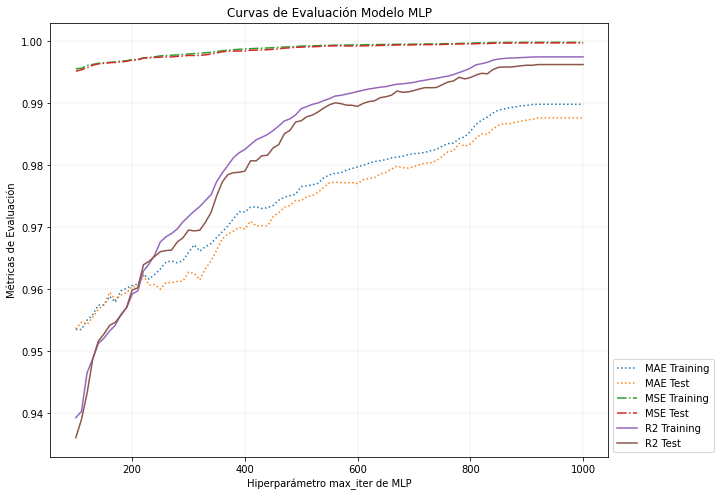

In [27]:
# Definir tamaño del gráfico
plt.figure(figsize=(10,8))

# Curvas MAE (Entrenamiento y Prueba)
plt.plot(valores_hiperparametro, MAE_Entrenamiento, linestyle=':', label = "MAE Training")
plt.plot(valores_hiperparametro, MAE_Prueba, linestyle=':', label = "MAE Test")

# Curvas MSE (Entrenamiento y Prueba)
plt.plot(valores_hiperparametro, MSE_Entrenamiento, linestyle='-.', label = "MSE Training")
plt.plot(valores_hiperparametro, MSE_Prueba, linestyle='-.', label = "MSE Test")

# Curvas R2 (Entrenamiento y Prueba)
plt.plot(valores_hiperparametro, R2_Entrenamiento, label = "R2 Training")
plt.plot(valores_hiperparametro, R2_Prueba, label = "R2 Test")

# Títulos del ejes X y Y
plt.xlabel('Hiperparámetro max_iter de MLP')
plt.ylabel('Métricas de Evaluación')

# Título del eje x
plt.title('Curvas de Evaluación Modelo MLP')

# Reubicar leyenda del gráfico
plt.legend(bbox_to_anchor=(1,0), loc = 'lower left')

# Grilla del gráfico
plt.grid(color='gray', linewidth=0.1)

# Desplegar figura
plt.show()

In [28]:
print(f'Tiempo de entrenamiento {tiempo_ciclo} segundos')

Tiempo de entrenamiento 259.5 segundos


## 3.2 Definir mejor hiperparámetro

Dataframe con métricas obtenidas por cada hiperparámetro

In [29]:
# Listas a dictionario de python 
evaluaciones = dict ( Valor_Hiperparametro = valores_hiperparametro, MAE_Entrenamiento = MAE_Entrenamiento, MAE_Prueba = MAE_Prueba,\
    MSE_Entrenamiento = MSE_Entrenamiento, MSE_Prueba = MSE_Prueba, R2_Entrenamiento = R2_Entrenamiento, R2_Prueba = R2_Prueba)

# Crear objeto Dataframe con listas de evaluaciones
df_evaluaciones = pd.DataFrame(evaluaciones)

# Vizualizar evaluación en objeto dataframe
df_evaluaciones.head()

,Valor_Hiperparametro,MAE_Entrenamiento,MAE_Prueba,MSE_Entrenamiento,MSE_Prueba,R2_Entrenamiento,R2_Prueba
0,100,0.9535,0.9536,0.9955,0.9952,0.9393,0.9361
1,110,0.9535,0.9547,0.9956,0.9954,0.9403,0.9390
2,120,0.9550,0.9543,0.9961,0.9957,0.9465,0.9432
3,130,0.9559,0.9554,0.9962,0.9961,0.9488,0.9487
4,140,0.9574,0.9568,0.9964,0.9963,0.9512,0.9516


Después de evaluar el rango de hiperpámetros en el modelo mediate un ciclo, se obtienen las métricas de evaluación (R2, MAE, MSE) para los subconjuntos de entrenamiento y prueba. Para optimizar el hiperparámetro es necesario conocer el punto de menor error: se empieza sacando un promedio ponderado de las métricas de error de cada subconjunto.

In [30]:
df_evaluaciones['MAE_Promedio_Ponderado'] = (0.8*df_evaluaciones['MAE_Entrenamiento']+0.2*df_evaluaciones['MAE_Prueba'])/1
df_evaluaciones['MSE_Promedio_Ponderado'] = (0.8*df_evaluaciones['MSE_Entrenamiento']+0.2*df_evaluaciones['MSE_Prueba'])/1
df_evaluaciones['R2_Promedio_Ponderado'] = (0.8*df_evaluaciones['R2_Entrenamiento']+0.2*df_evaluaciones['R2_Prueba'])/1

In [31]:
df_evaluaciones.head()

,Valor_Hiperparametro,MAE_Entrenamiento,MAE_Prueba,MSE_Entrenamiento,MSE_Prueba,R2_Entrenamiento,R2_Prueba,MAE_Promedio_Ponderado,MSE_Promedio_Ponderado,R2_Promedio_Ponderado
0,100,0.9535,0.9536,0.9955,0.9952,0.9393,0.9361,0.9535,0.9955,0.9386
1,110,0.9535,0.9547,0.9956,0.9954,0.9403,0.9390,0.9537,0.9956,0.9400
2,120,0.9550,0.9543,0.9961,0.9957,0.9465,0.9432,0.9549,0.9960,0.9459
3,130,0.9559,0.9554,0.9962,0.9961,0.9488,0.9487,0.9558,0.9962,0.9488
4,140,0.9574,0.9568,0.9964,0.9963,0.9512,0.9516,0.9573,0.9964,0.9513


Se obtiene el valor máximo de cada promedio

In [32]:
MAE_max = df_evaluaciones['MAE_Promedio_Ponderado'].max()
MSE_max = df_evaluaciones['MSE_Promedio_Ponderado'].max()
R2_max = df_evaluaciones['R2_Promedio_Ponderado'].max()

Se extraen las líneas correspondientes a los valores máximos calculados arriba

In [33]:
R2_Optimo = df_evaluaciones[df_evaluaciones['R2_Promedio_Ponderado'] == R2_max]
MSE_Optimo = df_evaluaciones[df_evaluaciones['MSE_Promedio_Ponderado'] == MSE_max]
MAE_Optimo = df_evaluaciones[df_evaluaciones['MAE_Promedio_Ponderado'] == MAE_max]

Se concatenan las líneas extraídas arriba y se promedia la columna Valor_Hiperparametro para obtener el valor óptimo

In [34]:
Hiperparametro_Optimo = pd.concat([R2_Optimo,MSE_Optimo,MAE_Optimo])
max_iter_optimizado = round(Hiperparametro_Optimo['Valor_Hiperparametro'].mean())
print(f"Hiperparámetro max_iter optimizado: {max_iter_optimizado}")

Hiperparámetro max_iter optimizado: 960


Ciclo MLP Regressor Optimizado

In [36]:
# Asignar modelo a variable y entrenar modelo
Modelo_MLP = MLPRegressor(random_state=42, solver = 'lbfgs', activation = 'tanh', max_iter = max_iter_optimizado)
Modelo_MLP.fit( atributos_entrenamiento , objetivos_entrenamiento )

# Obtener las métricas de evaluación con función creada evaluador
MSE_E, MAE_E, R2_E, MSE_P, MAE_P, R2_P, predicciones_entrenamiento, predicciones_prueba = evaluador(Modelo_MLP, atributos_entrenamiento, objetivos_entrenamiento, atributos_prueba, objetivos_prueba)


Estimación del error del Modelo Bagging-SVM mediante evaluador lineal

In [37]:
# Definir Y_real y Y_predicho de entrenamiento y prueba

Y_real_entrenamiento = objetivos_entrenamiento

Y_predicho_entrenamiento = predicciones_entrenamiento

Y_real_prueba = objetivos_prueba

Y_predicho_prueba = predicciones_prueba

Estimador = linear_model.LinearRegression()

RLE_Prueba = Estimador.fit(Y_real_prueba, Y_predicho_prueba)

RLE_Entrenamiento = Estimador.fit(Y_real_entrenamiento, Y_predicho_entrenamiento)

m_prueba, b_prueba = np.asscalar(RLE_Prueba.coef_), np.asscalar(RLE_Prueba.intercept_)

m_entrenamiento, b_entrenamiento = np.asscalar(RLE_Entrenamiento.coef_), np.asscalar(RLE_Entrenamiento.intercept_)

Graficar rectas de ajuste de subconjuntos de entrenamiento y de prueba

In [38]:
y_prueba = Y_real_prueba * m_prueba + b_prueba
y_entrenamiento = Y_real_entrenamiento * m_entrenamiento + b_entrenamiento

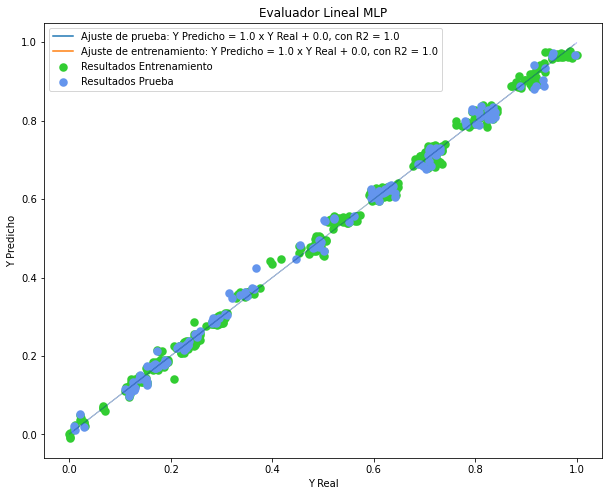

In [39]:
plt.figure(figsize=(10,8))

plt.title('Evaluador Lineal MLP')

plt.scatter(Y_real_entrenamiento, Y_predicho_entrenamiento, color='limegreen', linewidth=2.5, label = "Resultados Entrenamiento")
plt.scatter(Y_real_prueba, Y_predicho_prueba, color='cornflowerblue', linewidth=2.5, label = "Resultados Prueba")

plt.plot(Y_real_prueba, y_prueba, color='green', linewidth=1, alpha = 0.2)
plt.plot(Y_real_entrenamiento, y_entrenamiento, color='blue', linewidth=1, alpha = 0.2)

plt.plot([], [], '-', label=f"Ajuste de prueba: Y Predicho = {np.round(m_prueba, 2)} x Y Real + {np.round(b_prueba, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.plot([], [], '-', label=f"Ajuste de entrenamiento: Y Predicho = {np.round(m_entrenamiento, 2)} x Y Real + {np.round(b_entrenamiento, 2)}, con R2 = {np.round(r2_score(Y_real_prueba, Y_predicho_prueba), 2)}")
plt.legend()

plt.xlabel("Y Real") #eje x
plt.ylabel("Y Predicho") #eje y

plt.show()

Según lo anterior, el intercepto y la pendiente para los subconjuntos de entrenamiento y prueba son idénticos (con la precisión utilizada, mayor precisión puede mostrar diferencias) indicando que hay alta generalización del modelo. Una pendiente de 1.0 indica que el modelo tiene el ajuste más balanceado.
Un intercepto de 0.0 indica que el modelo no tiene sesgo positivo ni negativo. 